In [477]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [478]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME', 'STATUS'], axis =1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


In [479]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [480]:
# Look at INCOME_AMT value counts for binning
income_counts = application_df['INCOME_AMT'].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

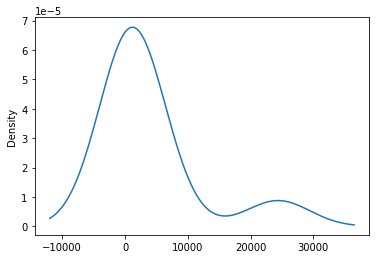

In [481]:
# Visualize the value counts of income_counts
income_counts.plot.density()

In [482]:
# Bin the INCOME_AMT column 
def income(row):
  income = row['INCOME_AMT']
  #updated_income == 0
  if income == '0':
    updated_income = '0'
  elif income == '1-9999':
    updated_income = '10000'
  elif income == '10000-24999':
    updated_income = '24999'
  elif income == '25000-99999':
    updated_income = '100000'
  elif income == '100000-499999':
    updated_income = '500000'
  elif income == '1M-5M':
    updated_income = '1000000'
  elif income == '5M-10M':
    updated_income = '>5000000'
  elif income == '10M-50M':
    updated_income = '>5000000' 
  elif income == '50M+':
    updated_income = '>5000000'       
  else:
    updated_income = income
  return updated_income


#replace_incomes = list(income(income_counts).index)
application_df.INCOME_AMT = application_df.apply(income, axis=1)

In [483]:
income_counts = application_df['INCOME_AMT'].value_counts()
income_counts

0           24388
100000       3747
500000       3374
1000000       955
10000         728
>5000000      564
24999         543
Name: INCOME_AMT, dtype: int64

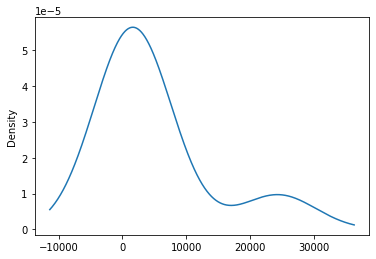

In [484]:
# Visualize the value counts of income_counts
income_counts.plot.density()

In [485]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [486]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [487]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [488]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [489]:
# Look at ASK_AMT value counts for binning
ask_counts = application_df['ASK_AMT'].value_counts()
ask_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

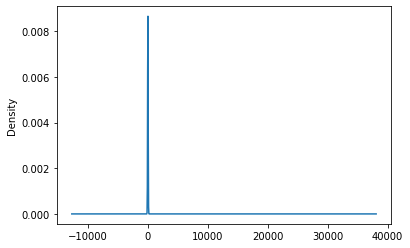

In [490]:
# Visualize the value counts of ASK_AMT
ask_counts.plot.density()

In [491]:
# Observe metrics of ASK_AMT column 
application_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [492]:
# Bin the ASK_AMT values 
ask_bins = [4999, 6000, 20000, 50000, 100000, 500000, 90000000000]

application_df['ASK_AMT'].groupby(pd.cut(application_df['ASK_AMT'], ask_bins)).count()

bin_names = ['5000-6000',
             '6001-20000', 
             '20001-50000', 
             '50001-100000', 
             '100001-500000', 
             '>500000']

In [493]:
# Add the ASK_AMT bins to the dataframe as a new column, ASK_RANGE 
application_df['ASK_RANGE'] = pd.cut(application_df['ASK_AMT'], ask_bins, labels=bin_names).astype(str)

# Drop the original ASK_AMT column
application_df = application_df.drop(['ASK_AMT'], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_RANGE
0,T10,Independent,C1000,ProductDev,Association,0,N,1,5000-6000
1,T3,Independent,C2000,Preservation,Co-operative,10000,N,1,100001-500000
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,0,5000-6000
3,T3,CompanySponsored,C2000,Preservation,Trust,24999,N,1,6001-20000
4,T3,Independent,C1000,Heathcare,Trust,500000,N,1,100001-500000
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N,0,5000-6000
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N,0,5000-6000
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N,0,5000-6000
34297,T5,Independent,C3000,ProductDev,Association,0,N,1,5000-6000


In [494]:
# Check the number of unique values in each column again
application_df.nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                7
SPECIAL_CONSIDERATIONS    2
IS_SUCCESSFUL             2
ASK_RANGE                 6
dtype: int64

In [495]:
ranges_counts = application_df['ASK_RANGE'].value_counts()
ranges_counts

5000-6000        25532
100001-500000     2304
>500000           2227
20001-50000       1609
50001-100000      1423
6001-20000        1204
Name: ASK_RANGE, dtype: int64

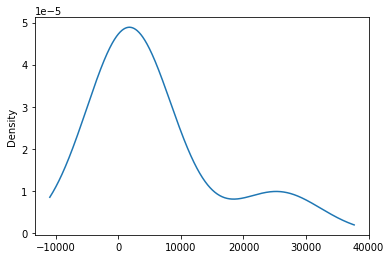

In [496]:
# Visualize the value counts of ASK_RANGE
ranges_counts.plot.density()

In [497]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_RANGE']

In [498]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_500000,INCOME_AMT_>5000000,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_RANGE_100001-500000,ASK_RANGE_20001-50000,ASK_RANGE_5000-6000,ASK_RANGE_50001-100000,ASK_RANGE_6001-20000,ASK_RANGE_>500000
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [499]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_500000,INCOME_AMT_>5000000,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_RANGE_100001-500000,ASK_RANGE_20001-50000,ASK_RANGE_5000-6000,ASK_RANGE_50001-100000,ASK_RANGE_6001-20000,ASK_RANGE_>500000
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [500]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    stratify=y)

In [501]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [502]:
# Importing checkpoint dependencies 
import os 
from tensorflow.python.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames 
os.makedirs('challenge_checkpoints/', exist_ok=True)
checkpoint_path = 'challenge_checkpoints/weights.{epoch:02d}.hdf5'

In [503]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, 
                          input_dim=number_input_features, 
                          activation = 'linear'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, 
                          activation = 'relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, 
                          activation = 'relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 80)                3680      
                                                                 
 dense_60 (Dense)            (None, 30)                2430      
                                                                 
 dense_61 (Dense)            (None, 10)                310       
                                                                 
 dense_62 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,431
Trainable params: 6,431
Non-trainable params: 0
_________________________________________________________________


In [504]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [505]:
# Callback saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5)

In [506]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5698 - accuracy: 0.7189
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7283
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7300
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7318
Epoch 5/100
783/804 [============================>.] - ETA: 0s - loss: 0.5490 - accuracy: 0.7310
Epoch 00005: saving model to challenge_checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7304
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5486 - accuracy: 0.7317
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7319
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5479 - accuracy: 0.7312
Epoch 9/100
804/804 [===================

In [507]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5648 - accuracy: 0.7247 - 387ms/epoch - 1ms/step
Loss: 0.5648086071014404, Accuracy: 0.7246647477149963


In [508]:
# Export the model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")